# Unsupervised Machine Learning

### Importing Libraries and Data Cleaning
### The elbow Techniques
### k-means clustering
### Descriptive Statistics

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Online Shopping Analysis\Data'

In [4]:
df =  pd.read_excel(os.path.join(path, 'Prepared Data', 'Cleaned_Data.xlsx'))

In [5]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


#### Data Cleaning

In [6]:
# In Location column Replacing Chicago as Illinois,
df['Location'].replace({'Chicago': 'Illinois'}, inplace = True)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_ID', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'TAX', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

#### performance improvement after removing outliers¶

In [8]:
# Clean the extreme values from the "Avg_Price" variable observed during the consistency checks.

df_1 = df[df['Avg_Price'] <=100]

In [9]:
# Clean the extreme values from the "Online_Spend" variable observed during the consistency checks.
df_2 = df_1[df_1['Online_Spend'] <=1000]

In [10]:
# Create a subset which contains numerical variables only

df_sub = df_2[['Quantity', 'Avg_Price', 'Delivery_Charges', 'TAX', 'Offline_Spend', 'Online_Spend', 'Discount_pct']]

### The elbow technique

In [11]:
# Define the range of potential clusters in the data
num_cl = range(1, 20)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

score

[-7245267584.55526,
 -1983703693.2775357,
 -1038424561.404248,
 -615845793.9597746,
 -438944178.5775314,
 -344165998.3831388,
 -266186005.69654644,
 -205372309.0748151,
 -162762661.34358475,
 -135187038.41221175,
 -117196316.18580014,
 -97359486.28360786,
 -82582191.93880355,
 -68741098.04882872,
 -54235856.65254696,
 -45111395.98701995,
 -38489890.01808435,
 -33431258.327215258,
 -30144313.85481162]

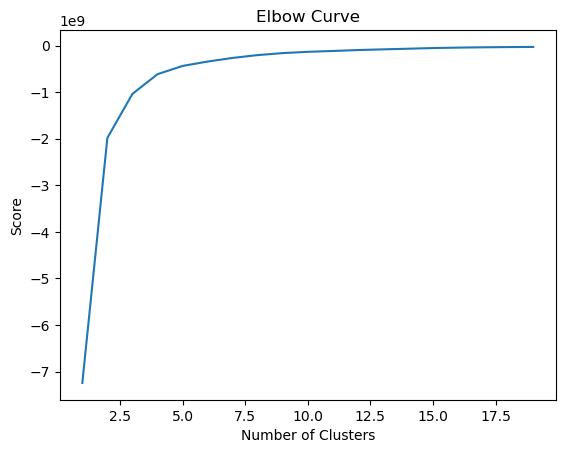

In [13]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The Elbow curve shows that the curve jumps from three to five X-asis and after that the slightly increase. So I believe that the optimal number of clusters is 3. 

###  k-means clustering

In [14]:
# Create the k-means object with 3clusters

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [16]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column

df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_4612\2432410327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [17]:
df_sub.head()

,Quantity,Avg_Price,Delivery_Charges,TAX,Offline_Spend,Online_Spend,Discount_pct,clusters
245,2,81.5,6.5,0.1,3000,417.73,10,0
247,2,81.5,6.5,0.1,3000,417.73,10,0
268,1,81.5,6.5,0.1,3000,417.73,10,0
272,3,81.5,6.5,0.1,3000,417.73,10,0
282,4,81.5,6.5,0.1,3000,417.73,10,0


In [18]:
df_sub['clusters'].value_counts()

0    2319
1    1975
2    1184
Name: clusters, dtype: int64

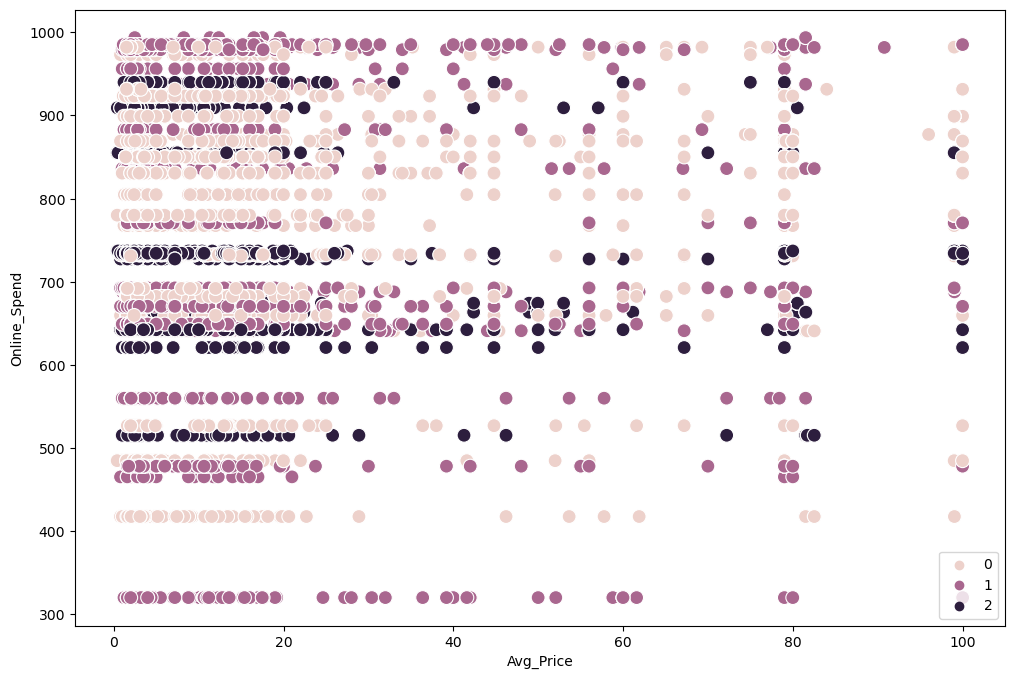

In [19]:
# Plot the clusters for the "Avg_Price" and "Online_Spend" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Avg_Price'], y=df_sub['Online_Spend'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Avg_Price') # Label x-axis.
plt.ylabel('Online_Spend') # Label y-axis.
plt.show()

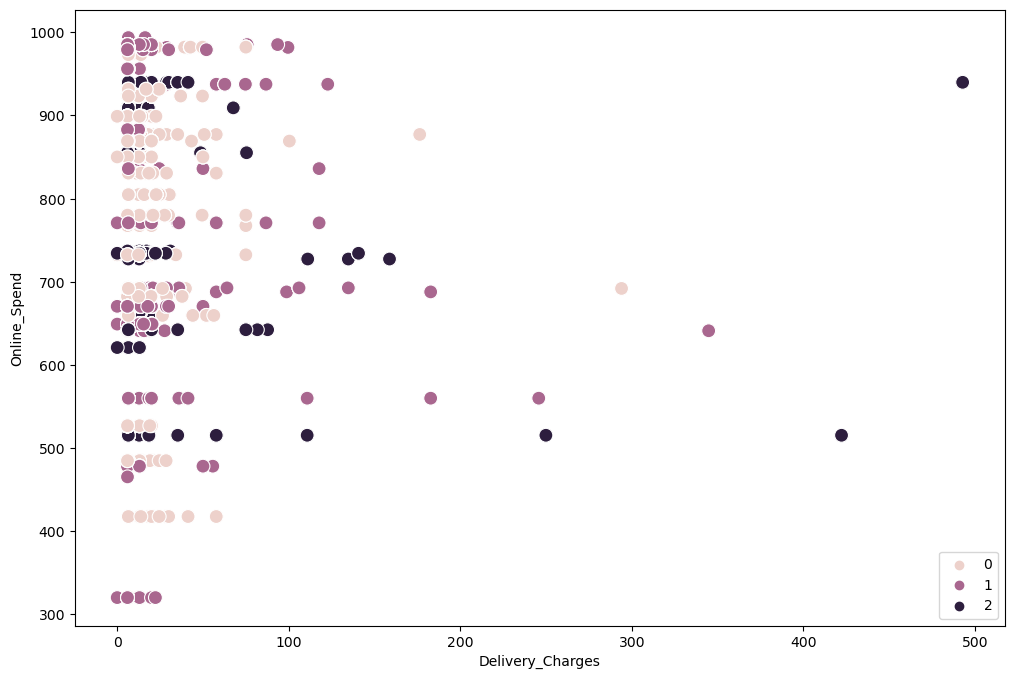

In [20]:
# Plot the clusters for the "Online_Spend" and "Delivery_Charges" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_sub['Delivery_Charges'], y = df_sub['Online_Spend'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Delivery_Charges')
plt.ylabel('Online_Spend')
plt.show()

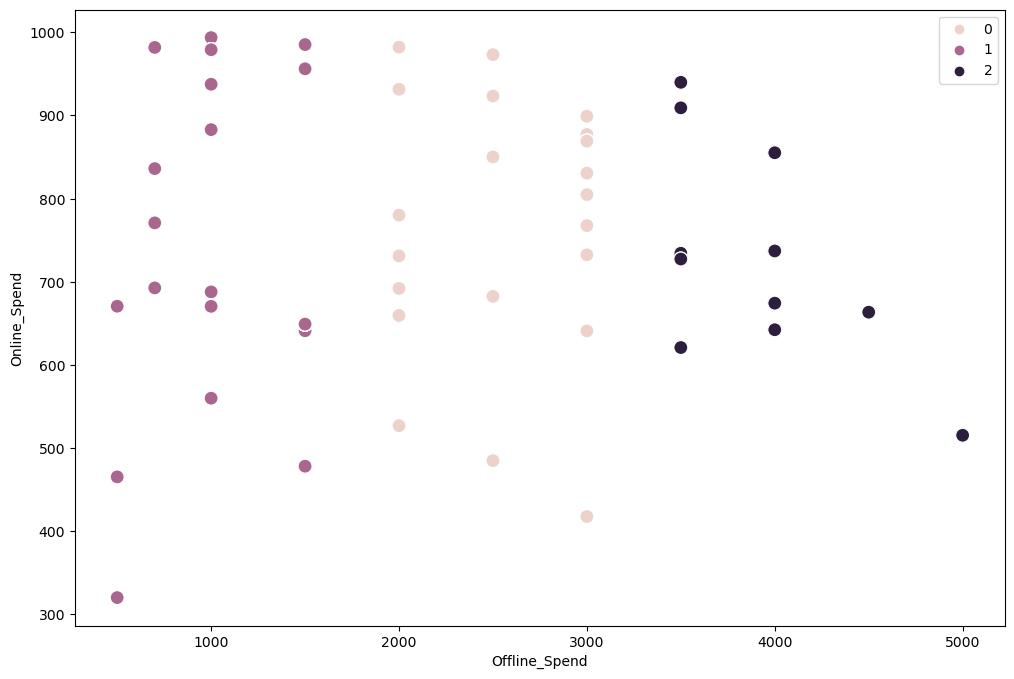

In [21]:
# Plot the clusters for the "Offline_Spend" and "Online_Spend" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_sub['Offline_Spend'], y = df_sub['Online_Spend'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Offline_Spend')
plt.ylabel('Online_Spend')
plt.show()

#### Conclusions

- Based on above charts, we can see three distinct clusters of online spend. First cluster spends more than 300 dollars, second clusters spend more than 400 dollars and third clusters spend more than 500 dollars 

- Average price and delivery charges have distribution in all three clusters indicating these might not affect online spend habit of people

- On the other hand offline spend has three categories. First clusters spend less 2000 dollars in offline shopping, while the second cluster spend between 2000-3000 and the third cluster spend more than 3000 dollars


### Descriptive Statistics


In [22]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_4612\43812089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark'


In [23]:
df_sub.groupby('cluster').agg({'Avg_Price':['mean', 'median'], 
                         'Online_Spend':['mean', 'median'], 
                         'Offline_Spend':['mean', 'median'],
                          'Delivery_Charges':['mean', 'median']})

Avg_Price        Online_Spend         Offline_Spend          \
              mean median         mean  median          mean  median   
cluster                                                                
dark     21.342331  14.02   721.684164  674.31   3916.807432  4000.0   
pink     22.365878  13.43   771.810310  780.15   2599.827512  2500.0   
purple   18.318476  11.99   745.440076  687.86   1086.278481  1000.0   

        Delivery_Charges         
                    mean median  
cluster                          
dark           17.962770    6.5  
pink           11.903122    6.5  
purple         15.433408    6.5

#### Conclusions

- Based on the statistics we see that pink color clusters have highest Avg_Price and online spend but lowest delivery charges. This indicates that higher the online purchases the delivery charges will be lower. Also increase in average price increases the online spend

- The difference between mean and median of Avg_Price and Delivery_Charges of different clusters are wide indicating that there are outliers in the data and it might impact the overall result of the clustering

- We need to work on removing the outliers and observing the data again. 

- We might need to look into other variables that might be affecting the shopping. Some of the data points can be rating of the products, frequency of purchases, etc. These data are not available in the provided dataset, currently but need to be observed for better result